https://machinelearningmastery.com/autoencoder-for-regression/

In [12]:
!pip install pydot

In [13]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
url = ("https://raw.githubusercontent.com/CSfromCS/VHS-Thesis/0a668228516a615aa5ff9c047a1a05a5531d62ea/datatocsv2.csv")
df = pd.read_csv(url, parse_dates=True)
# rename column
df.rename(columns={'Time to Next': 'y'}, inplace=True)

# Extract feature and target arrays
X, y = df.drop('y', axis=1), df[['y']]

# get dummies
X = pd.get_dummies(X)

X = pd.get_dummies(X, columns=['Day of Week'])

#minmax all columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[:] = scaler.fit_transform(X)
# y[:] = scaler.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

print(X_train.shape[1], y_train.shape)
X

20 (889, 1)


,Sec of Day,Hour,Min,Sec,Round,Lat,Long,isStop,Next Lat,Next Long,Abs Distance,To Station_A,To Station_B,To Station_C,To Station_D,Day of Week_2,Day of Week_3,Day of Week_4,Day of Week_5,Day of Week_6
0,0.318931,0.272727,0.830508,0.400000,0.0,0.789202,0.907889,0.0,1.0,0.5,0.648680,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.321983,0.272727,0.864407,0.400000,0.0,0.989599,0.601581,1.0,1.0,0.5,0.142453,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.325034,0.272727,0.898305,0.400000,0.0,0.998550,0.461603,1.0,0.5,0.0,0.960989,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.328086,0.272727,0.932203,0.400000,0.0,0.801546,0.101150,0.0,0.5,0.0,0.448610,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.331138,0.272727,0.966102,0.400000,0.0,0.337534,0.027131,0.0,0.0,0.5,0.821419,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.921418,0.909091,0.406780,0.142857,1.0,0.761557,0.926143,0.0,1.0,0.5,0.690049,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1043,0.924470,0.909091,0.440678,0.142857,1.0,0.997337,0.551790,1.0,1.0,0.5,0.071198,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1044,0.927521,0.909091,0.474576,0.142857,1.0,0.999964,0.507911,1.0,1.0,0.5,0.008886,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1045,0.930573,0.909091,0.508475,0.142857,1.0,0.908041,0.211000,0.0,0.5,0.0,0.648963,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
from keras import Input, Model
from keras.layers import Dense,Conv2D,MaxPooling2D,UpSampling2D, BatchNormalization, ReLU
from tensorflow.keras.utils import plot_model

In [15]:
# define encoder
n_inputs = X_train.shape[1]
visible = Input(shape=(n_inputs,))
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = ReLU()(e)
# define bottleneck
n_bottleneck = 10
bottleneck = Dense(n_bottleneck)(e)

In [16]:
...
# define decoder
d = Dense(n_inputs*2)(bottleneck)
d = BatchNormalization()(d)
d = ReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)
# define autoencoder model
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

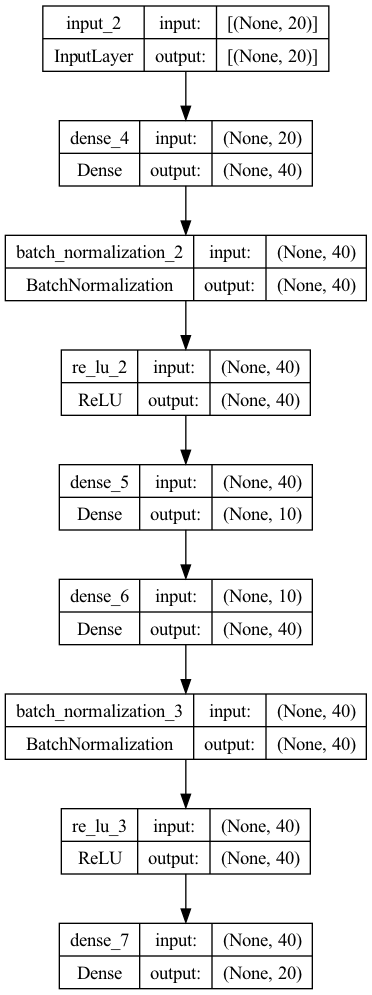

In [17]:
...
# plot the autoencoder
plot_model(model, 'autoencoder.png', show_shapes=True)

In [18]:
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=400, batch_size=16, verbose=2, validation_data=(X_test,X_test))

Epoch 1/400
56/56 - 0s - loss: 0.4368 - val_loss: 0.2055 - 481ms/epoch - 9ms/step
Epoch 2/400
56/56 - 0s - loss: 0.1601 - val_loss: 0.1380 - 49ms/epoch - 871us/step
Epoch 3/400
56/56 - 0s - loss: 0.1007 - val_loss: 0.1024 - 47ms/epoch - 842us/step
Epoch 4/400
56/56 - 0s - loss: 0.0808 - val_loss: 0.0757 - 49ms/epoch - 870us/step
Epoch 5/400
56/56 - 0s - loss: 0.0688 - val_loss: 0.0580 - 48ms/epoch - 859us/step
Epoch 6/400
56/56 - 0s - loss: 0.0621 - val_loss: 0.0472 - 48ms/epoch - 854us/step
Epoch 7/400
56/56 - 0s - loss: 0.0583 - val_loss: 0.0429 - 50ms/epoch - 893us/step
Epoch 8/400
56/56 - 0s - loss: 0.0521 - val_loss: 0.0384 - 51ms/epoch - 904us/step
Epoch 9/400
56/56 - 0s - loss: 0.0504 - val_loss: 0.0365 - 57ms/epoch - 1ms/step
Epoch 10/400
56/56 - 0s - loss: 0.0494 - val_loss: 0.0347 - 53ms/epoch - 938us/step
Epoch 11/400
56/56 - 0s - loss: 0.0465 - val_loss: 0.0331 - 65ms/epoch - 1ms/step
Epoch 12/400
56/56 - 0s - loss: 0.0455 - val_loss: 0.0303 - 50ms/epoch - 899us/step
Epoch 

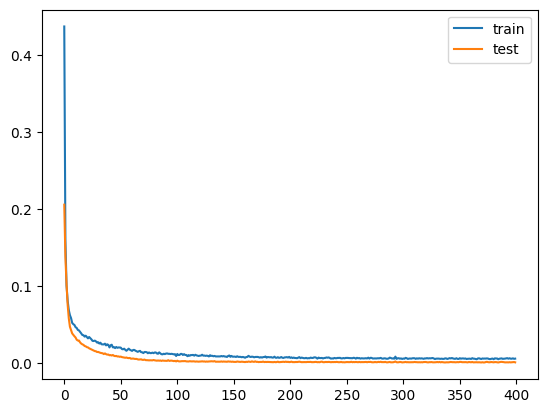

In [19]:
#use pyplot
from matplotlib import pyplot
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [20]:
...
# define an encoder model (without the decoder)
encoder = Model(inputs=visible, outputs=bottleneck)
# plot_model(encoder, 'encoder.png', show_shapes=True)
# save the encoder to file
encoder.save('encoderv2.h5')